In [1]:
## Import Important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [5]:
X

array([[-1.92212324,  0.98537276],
       [-0.89585732,  1.54769433],
       [-1.34083269, -0.85979907],
       ...,
       [ 0.18775608, -0.53778482],
       [-1.18747057,  0.90466554],
       [-2.45566913,  0.91284714]], shape=(1000, 2))

In [6]:
y

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [10]:
pd.DataFrame(X)[1]

0      0.985373
1      1.547694
2     -0.859799
3      1.308178
4      0.372414
         ...   
995    1.198122
996    0.575662
997   -0.537785
998    0.904666
999    0.912847
Name: 1, Length: 1000, dtype: float64

In [9]:
sns.scatterplot(pd.DataFrame(X)[0],pd.DataFrame(X)[1],hue=y)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

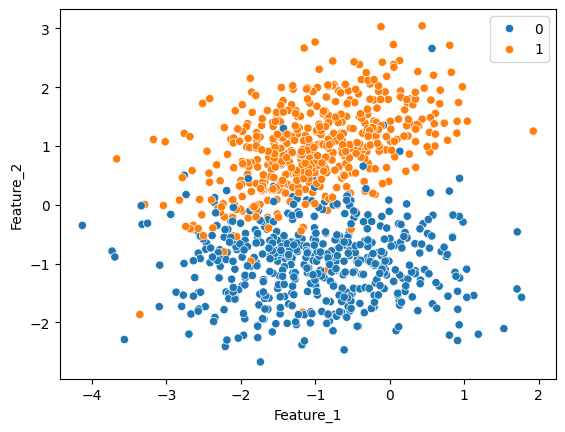

In [11]:
df_X = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Create scatter plot
sns.scatterplot(data=df_X, x="Feature_1", y="Feature_2", hue=y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
from sklearn.svm import SVC

In [14]:
svc=SVC(kernel='linear')

In [15]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred=svc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
print("accuracy_score",accuracy_score(y_test,y_pred))
print("confusion matrix",accuracy_score(y_test,y_pred))


accuracy_score 0.92
confusion matrix 0.92


Plot SVC Decision Boundary

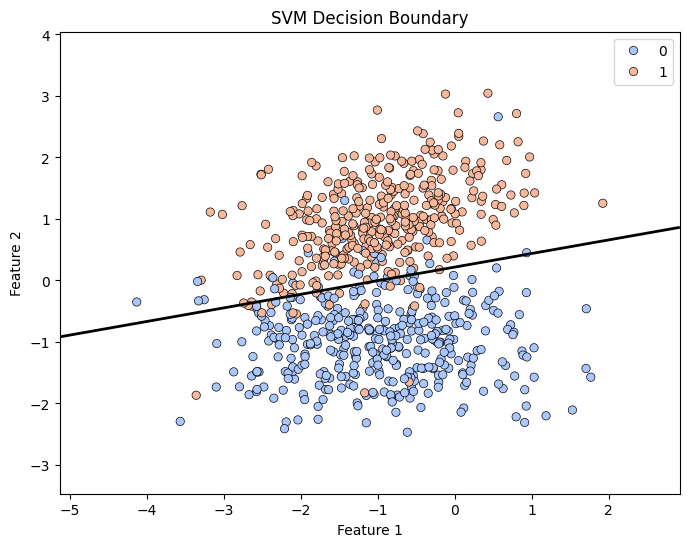

In [26]:
# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision function values for each grid point
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot scatter plot of training data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="coolwarm", edgecolor="k")

# Plot decision boundary (level=0 contour)
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()

Margin Line

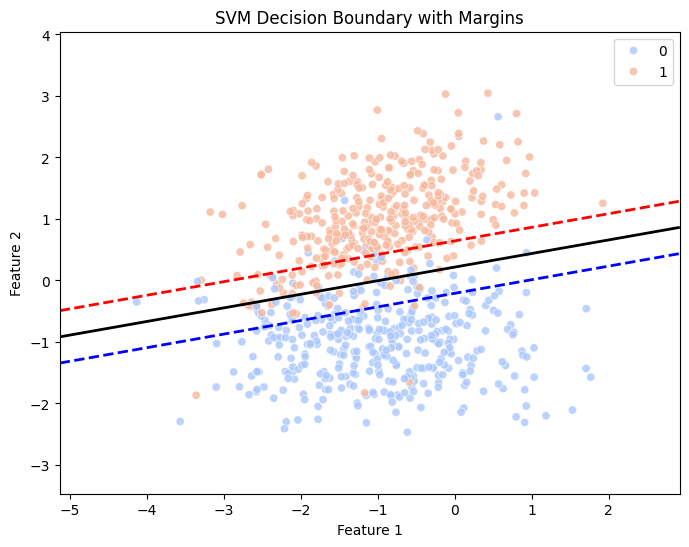

In [27]:

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision function values for each grid point
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot scatter plot of training data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="coolwarm", edgecolor="w", alpha=0.8)

# Plot decision boundary and margin lines
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=["blue", "black", "red"], linewidths=2, linestyles=["dashed", "solid", "dashed"])

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Margins")
plt.show()

### RBF Kernel

Changing n_clusters_per_class=1 to n_clusters_per_class=2

In [28]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

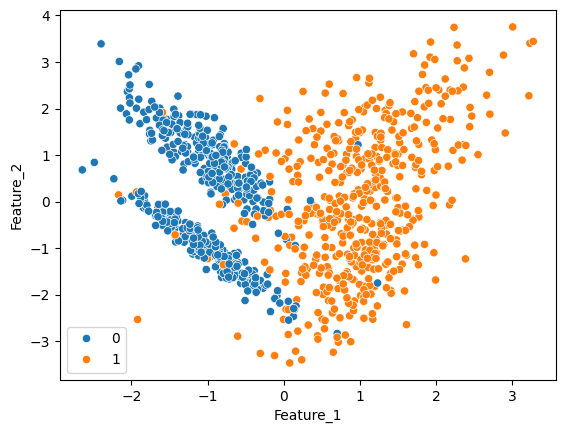

In [29]:
df_X = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Create scatter plot
sns.scatterplot(data=df_X, x="Feature_1", y="Feature_2", hue=y)

In [ ]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)

SVC()

In [32]:
y_pred=rbf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy_score",accuracy_score(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))

accuracy_score 0.912
confusion matrix [[105  13]
 [  9 123]]


#### SVM Decision Boundary for RBF Kernel

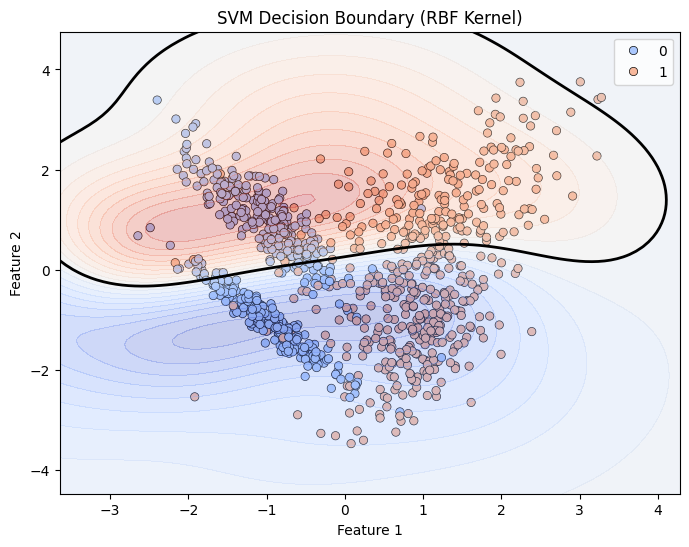

In [35]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision function
Z = rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()

### Poly Kernal

In [42]:
poly=SVC(kernel='poly', degree=3)
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [46]:
y_pred3=poly.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy_score",accuracy_score(y_test,y_pred3))
print("confusion matrix",confusion_matrix(y_test,y_pred3))
print("classification report",classification_report(y_test,y_pred3))

accuracy_score 0.904
confusion matrix [[109   9]
 [ 15 117]]
classification report               precision    recall  f1-score   support

           0       0.88      0.92      0.90       118
           1       0.93      0.89      0.91       132

    accuracy                           0.90       250
   macro avg       0.90      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250



#### SVM Decision Boundary for Polynomial Kernel

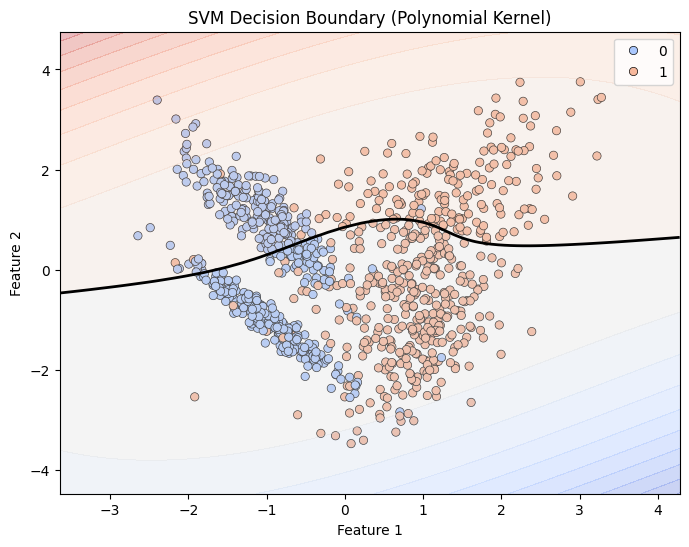

In [48]:
# Compute decision function
Z = poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary (Polynomial Kernel)")
plt.show()

### Sigmoid Kernal

In [49]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)


SVC(kernel='sigmoid')

In [50]:
y_pred4=sigmoid.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy_score",accuracy_score(y_test,y_pred4))
print("confusion matrix",confusion_matrix(y_test,y_pred4))
print("classification report",classification_report(y_test,y_pred4))

accuracy_score 0.812
confusion matrix [[ 94  24]
 [ 23 109]]
classification report               precision    recall  f1-score   support

           0       0.80      0.80      0.80       118
           1       0.82      0.83      0.82       132

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



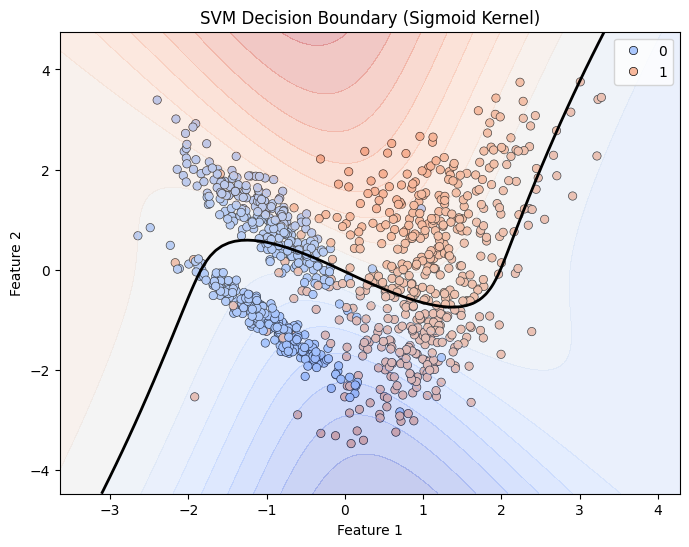

In [53]:
# Compute decision function
Z = sigmoid.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary (Sigmoid Kernel)")
plt.show()

### Hyperparameter Tuning For SVC with RBF Kernel as it has best accuracy

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'C':[0.1,1,10,100,1000],
                'gamma': [1,0.1,0.01,0.001,0.0001],
                'kernel':['rbf']}

In [60]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [63]:
grid.best_score_

np.float64(0.9359999999999999)

In [64]:
##prediction
y_pred5=grid.predict(X_test)
print("accuracy_score",accuracy_score(y_test,y_pred5))
print("confusion matrix",confusion_matrix(y_test,y_pred5))
print("classification report",classification_report(y_test,y_pred5))

accuracy_score 0.92
confusion matrix [[105  13]
 [  7 125]]
classification report               precision    recall  f1-score   support

           0       0.94      0.89      0.91       118
           1       0.91      0.95      0.93       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



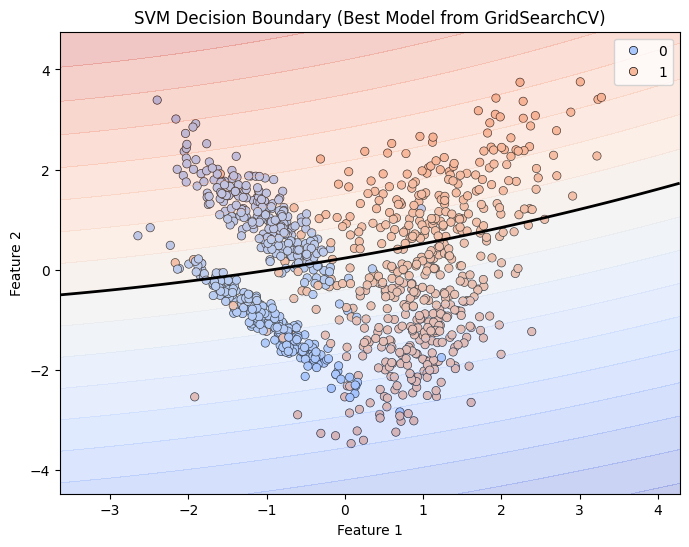

In [68]:
# Extract the best SVM model from GridSearchCV
best_svc = grid.best_estimator_

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Compute decision function using the best model
Z = best_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor="k")
plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary (Best Model from GridSearchCV)")
plt.show()